In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pecanpy

In [2]:
%matplotlib inline
plt.style.use("ggplot")

In [3]:
pd.__version__

'0.22.0'

In [4]:
# define user credentials
USER_NAME = ???
PASSWORD = ???

# define relevant schema name
SCHEMA = ???

# create the engine that connects to the database...
local_engine = pecanpy.create_local_engine(USER_NAME, PASSWORD)

In [5]:
with local_engine.connect() as con:
    metadata_df = pecanpy.read_metadata_table(con, schema=SCHEMA)

In [6]:
metadata_df.head()

,active_record,building_type,program_579,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,city,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
dataid,,,,,,,,,,,,,,,,,,,,,
5545,True,Single-Family Home,False,True,True,False,False,CCET - Control,None,Austin,...,True,False,False,False,False,False,False,False,False,False
9160,True,Single-Family Home,False,True,True,False,False,CCET - Portal Only,None,Austin,...,True,False,False,False,False,False,False,False,False,False
2199,True,Single-Family Home,False,False,True,False,False,CCET - Portal Only,None,Austin,...,True,False,False,False,False,False,False,False,False,False
5026,True,Single-Family Home,False,False,True,False,False,None,None,Austin,...,True,False,False,False,False,False,False,False,False,False
7335,True,Single-Family Home,False,False,True,False,False,None,None,Austin,...,False,False,False,False,False,False,False,False,False,False


In [7]:
time = datetime.datetime.now()
seed = time.hour * 10000 + time.minute * 100 + time.second
prng = np.random.RandomState(seed)
with_egauge_data = metadata_df[metadata_df.egauge_min_time.notnull()]
random_household = with_egauge_data.sample(n=1, random_state=prng)

In [8]:
# how much available data possibly exists?
start_time = random_household.iloc[0].egauge_min_time
end_time = random_household.iloc[0].egauge_max_time
time_delta = end_time - start_time

In [9]:
time_delta

Timedelta('1816 days 09:59:00')

In [10]:
with local_engine.connect() as local_con:

    # extract the required parameters
    dataid = random_household.iloc[0].name
    start_time = random_household.iloc[0].egauge_min_time
    end_time = random_household.iloc[0].egauge_max_time

    # pull down data for different aggregations
    minutes_df = pecanpy.read_electricity_egauge_query(local_con, SCHEMA, dataid, start_time, end_time, "all", 'T')
    qtr_hour_df = pecanpy.read_electricity_egauge_query(local_con, SCHEMA, dataid, start_time, end_time, "all", "15T")
    hours_df = pecanpy.read_electricity_egauge_query(local_con, SCHEMA, dataid, start_time, end_time, "all", 'H')

## Minutes data

In [11]:
minutes_df.shape

(2429727, 68)

In [12]:
minutes_df.head()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localminute,,,,,,,,,,,,,,,,,,,,,
2012-12-11 18:00:00-06:00,7940,NaN,NaN,None,None,None,None,0.0,None,0.013,...,0.082,None,None,None,None,None,None,None,None,None
2012-12-11 18:01:00-06:00,7940,NaN,NaN,None,None,None,None,0.0,None,0.013,...,0.082,None,None,None,None,None,None,None,None,None
2012-12-11 18:02:00-06:00,7940,NaN,NaN,None,None,None,None,0.0,None,0.013,...,0.082,None,None,None,None,None,None,None,None,None
2012-12-11 18:03:00-06:00,7940,NaN,NaN,None,None,None,None,0.0,None,0.013,...,0.082,None,None,None,None,None,None,None,None,None
2012-12-11 18:04:00-06:00,7940,NaN,NaN,None,None,None,None,0.0,None,0.013,...,0.082,None,None,None,None,None,None,None,None,None


In [13]:
minutes_df.tail()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localminute,,,,,,,,,,,,,,,,,,,,,
2017-12-02 03:54:00-06:00,7940,0.759,0.0,None,None,None,None,0.0,None,0.0,...,0.121,None,None,None,None,None,None,None,None,None
2017-12-02 03:55:00-06:00,7940,0.757,0.0,None,None,None,None,0.0,None,0.0,...,0.117,None,None,None,None,None,None,None,None,None
2017-12-02 03:56:00-06:00,7940,0.756,0.0,None,None,None,None,0.0,None,0.0,...,0.115,None,None,None,None,None,None,None,None,None
2017-12-02 03:57:00-06:00,7940,0.809,0.0,None,None,None,None,0.0,None,0.0,...,0.101,None,None,None,None,None,None,None,None,None
2017-12-02 03:58:00-06:00,7940,0.876,0.0,None,None,None,None,0.0,None,0.0,...,0.100,None,None,None,None,None,None,None,None,None


In [14]:
# if gen is not null, then household is a prosumer!
minutes_df[["grid", "use", "gen"]].head()

,grid,use,gen
localminute,,,
2012-12-11 18:00:00-06:00,NaN,NaN,NaN
2012-12-11 18:01:00-06:00,NaN,NaN,NaN
2012-12-11 18:02:00-06:00,NaN,NaN,NaN
2012-12-11 18:03:00-06:00,NaN,NaN,NaN
2012-12-11 18:04:00-06:00,NaN,NaN,NaN


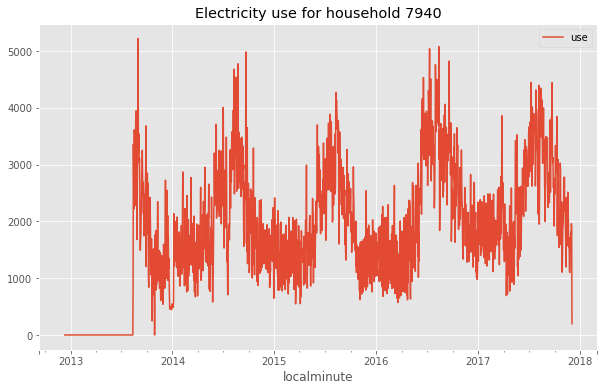

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# plot total daily electricity usage
minutes_df.use.resample("D").sum().plot(ax=ax, label="use")
ax.set_title("Electricity use for household {}".format(dataid))
ax.legend()
plt.show()

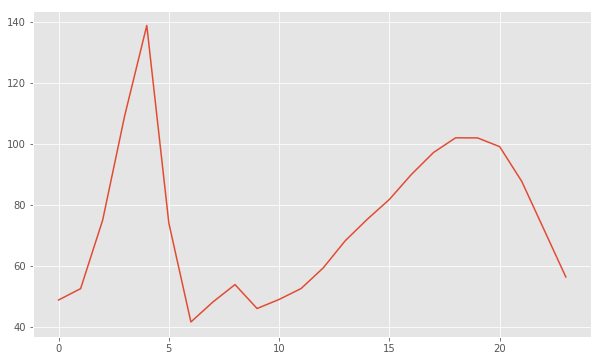

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
hourly_load_curves = (minutes_df.resample("H")
                                .sum()
                                .groupby(lambda idx: idx.hour)
                                .mean())
hourly_load_curves.use.plot(ax=ax);

## 15-minute data

In [17]:
qtr_hour_df.head()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
local_15min,,,,,,,,,,,,,,,,,,,,,
2012-12-11 18:00:00-06:00,7940,NaN,NaN,None,None,None,None,0.0,None,0.013,...,0.082,None,None,None,None,None,None,None,None,None
2012-12-11 18:15:00-06:00,7940,NaN,NaN,None,None,None,None,0.0,None,0.013,...,0.082,None,None,None,None,None,None,None,None,None
2012-12-11 18:30:00-06:00,7940,NaN,NaN,None,None,None,None,0.0,None,0.013,...,0.082,None,None,None,None,None,None,None,None,None
2012-12-11 18:45:00-06:00,7940,NaN,NaN,None,None,None,None,0.0,None,0.013,...,0.082,None,None,None,None,None,None,None,None,None
2012-12-11 19:00:00-06:00,7940,NaN,NaN,None,None,None,None,0.0,None,0.013,...,0.082,None,None,None,None,None,None,None,None,None


In [18]:
qtr_hour_df.tail()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
local_15min,,,,,,,,,,,,,,,,,,,,,
2017-12-02 02:45:00-06:00,7940,0.851933,0.0,None,None,None,None,0.0,None,0.0,...,0.095667,None,None,None,None,None,None,None,None,None
2017-12-02 03:00:00-06:00,7940,0.843200,0.0,None,None,None,None,0.0,None,0.0,...,0.093600,None,None,None,None,None,None,None,None,None
2017-12-02 03:15:00-06:00,7940,0.868800,0.0,None,None,None,None,0.0,None,0.0,...,0.133467,None,None,None,None,None,None,None,None,None
2017-12-02 03:30:00-06:00,7940,0.898333,0.0,None,None,None,None,0.0,None,0.0,...,0.097800,None,None,None,None,None,None,None,None,None
2017-12-02 03:45:00-06:00,7940,0.785800,0.0,None,None,None,None,0.0,None,0.0,...,0.065200,None,None,None,None,None,None,None,None,None


In [19]:
# can recover the 15-minute data ay aggregating the minutes data!
minutes_df.resample("15T").mean().tail()

,dataid,use,air1,bathroom1,bedroom1,car1,clotheswasher1,dishwasher1,drye1,furnace1,garage1,gen,grid,kitchenapp1,kitchenapp2,microwave1,office1,refrigerator1
localminute,,,,,,,,,,,,,,,,,,
2017-12-02 02:45:00-06:00,7940.0,0.851933,0.0,0.0,0.0,0.0,0.0,0.0,0.003,0.523067,0.007,-0.005,0.851933,0.0,0.0,0.003,0.072000,0.095667
2017-12-02 03:00:00-06:00,7940.0,0.843200,0.0,0.0,0.0,0.0,0.0,0.0,0.003,0.523333,0.007,-0.005,0.843200,0.0,0.0,0.003,0.072067,0.093600
2017-12-02 03:15:00-06:00,7940.0,0.868800,0.0,0.0,0.0,0.0,0.0,0.0,0.003,0.523067,0.007,-0.005,0.868800,0.0,0.0,0.003,0.072000,0.133467
2017-12-02 03:30:00-06:00,7940.0,0.898333,0.0,0.0,0.0,0.0,0.0,0.0,0.003,0.523267,0.007,-0.005,0.898333,0.0,0.0,0.003,0.072000,0.097800
2017-12-02 03:45:00-06:00,7940.0,0.779286,0.0,0.0,0.0,0.0,0.0,0.0,0.003,0.523429,0.007,-0.005,0.779286,0.0,0.0,0.003,0.072000,0.062786


## Hours data

In [20]:
hours_df.head()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localhour,,,,,,,,,,,,,,,,,,,,,
2012-12-11 18:00:00-06:00,7940,NaN,NaN,None,None,None,None,0.0,None,0.013,...,0.082,None,None,None,None,None,None,None,None,None
2012-12-11 19:00:00-06:00,7940,NaN,NaN,None,None,None,None,0.0,None,0.013,...,0.082,None,None,None,None,None,None,None,None,None
2012-12-11 20:00:00-06:00,7940,NaN,NaN,None,None,None,None,0.0,None,0.013,...,0.082,None,None,None,None,None,None,None,None,None
2012-12-11 21:00:00-06:00,7940,NaN,NaN,None,None,None,None,0.0,None,0.013,...,0.082,None,None,None,None,None,None,None,None,None
2012-12-11 22:00:00-06:00,7940,NaN,NaN,None,None,None,None,0.0,None,0.013,...,0.082,None,None,None,None,None,None,None,None,None


In [21]:
hours_df.tail()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localhour,,,,,,,,,,,,,,,,,,,,,
2017-12-01 23:00:00-06:00,7940,0.903183,0.0,None,None,None,None,0.0,None,0.007383,...,0.086767,None,None,None,None,None,None,None,None,None
2017-12-02 00:00:00-06:00,7940,0.848583,0.0,None,None,None,None,0.0,None,0.000000,...,0.095550,None,None,None,None,None,None,None,None,None
2017-12-02 01:00:00-06:00,7940,0.781900,0.0,None,None,None,None,0.0,None,0.000000,...,0.017733,None,None,None,None,None,None,None,None,None
2017-12-02 02:00:00-06:00,7940,0.833983,0.0,None,None,None,None,0.0,None,0.000000,...,0.087850,None,None,None,None,None,None,None,None,None
2017-12-02 03:00:00-06:00,7940,0.849033,0.0,None,None,None,None,0.0,None,0.000000,...,0.097517,None,None,None,None,None,None,None,None,None


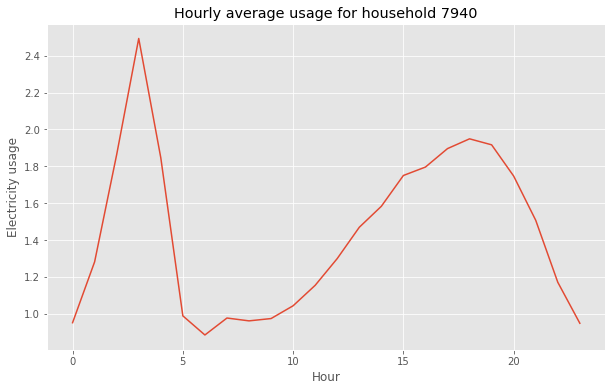

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.set_xlabel("Hour")
ax.set_ylabel("Electricity usage")
ax.set_title("Hourly average usage for household {}".format(dataid))
hours_df.use.groupby(lambda idx: idx.hour).mean().plot(ax=ax);
